In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns


# Load data
file_path = 'C:/Users/Admin/Desktop/ecommerce_clickstream_transactions.csv'
clickstream_data = pd.read_csv(file_path)

# Inspect data types
print(clickstream_data.dtypes)

# Define numeric and categorical features correctly
numeric_features = ['Amount']  # Ensure these are indeed numerical
categorical_features = ['EventType', 'ProductID', 'Outcome']  # Ensure these are categorical

# Check the data types of these columns
print(clickstream_data[numeric_features].dtypes)
print(clickstream_data[categorical_features].dtypes)

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocess the data
try:
    X_preprocessed = preprocessor.fit_transform(clickstream_data)
    print("Preprocessed data shape:", X_preprocessed.shape)
except Exception as e:
    print("An error occurred during preprocessing:", e)

# Extract feature names
num_feature_names = numeric_features
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = list(num_feature_names) + list(cat_feature_names)
print("All feature names:", all_feature_names)
print("Length of all feature names:", len(all_feature_names))
print("Shape of preprocessed data:", X_preprocessed.shape)

# Create DataFrame with preprocessed data
try:
    X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)
    print("x",X_preprocessed)
except ValueError as ve:
    print("ValueError:", ve)
    print("The number of columns in preprocessed data:", X_preprocessed.shape[1])
    print("The number of feature names provided:", len(all_feature_names))


UserID         int64
SessionID      int64
Timestamp     object
EventType     object
ProductID     object
Amount       float64
Outcome       object
dtype: object
Amount    float64
dtype: object
EventType    object
ProductID    object
Outcome      object
dtype: object
Preprocessed data shape: (74817, 8756)
All feature names: ['Amount', 'EventType_add_to_cart', 'EventType_click', 'EventType_login', 'EventType_logout', 'EventType_page_view', 'EventType_product_view', 'EventType_purchase', 'ProductID_prod_1000', 'ProductID_prod_1001', 'ProductID_prod_1002', 'ProductID_prod_1004', 'ProductID_prod_1005', 'ProductID_prod_1006', 'ProductID_prod_1007', 'ProductID_prod_1008', 'ProductID_prod_1009', 'ProductID_prod_1010', 'ProductID_prod_1011', 'ProductID_prod_1012', 'ProductID_prod_1013', 'ProductID_prod_1014', 'ProductID_prod_1015', 'ProductID_prod_1016', 'ProductID_prod_1017', 'ProductID_prod_1018', 'ProductID_prod_1019', 'ProductID_prod_1020', 'ProductID_prod_1021', 'ProductID_prod_1022', 'Pro

UserID         int64
SessionID      int64
Timestamp     object
EventType     object
ProductID     object
Amount       float64
Outcome       object
dtype: object
Amount    float64
dtype: object
EventType    object
ProductID    object
Outcome      object
dtype: object
Preprocessed data shape: (74817, 8756)
All feature names: ['Amount', 'EventType_add_to_cart', 'EventType_click', 'EventType_login', 'EventType_logout', 'EventType_page_view', 'EventType_product_view', 'EventType_purchase', 'ProductID_prod_1000', 'ProductID_prod_1001', 'ProductID_prod_1002', 'ProductID_prod_1004', 'ProductID_prod_1005', 'ProductID_prod_1006', 'ProductID_prod_1007', 'ProductID_prod_1008', 'ProductID_prod_1009', 'ProductID_prod_1010', 'ProductID_prod_1011', 'ProductID_prod_1012', 'ProductID_prod_1013', 'ProductID_prod_1014', 'ProductID_prod_1015', 'ProductID_prod_1016', 'ProductID_prod_1017', 'ProductID_prod_1018', 'ProductID_prod_1019', 'ProductID_prod_1020', 'ProductID_prod_1021', 'ProductID_prod_1022', 'Pro

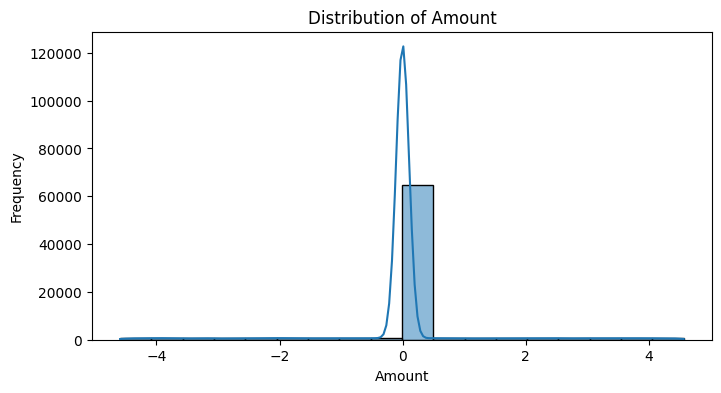

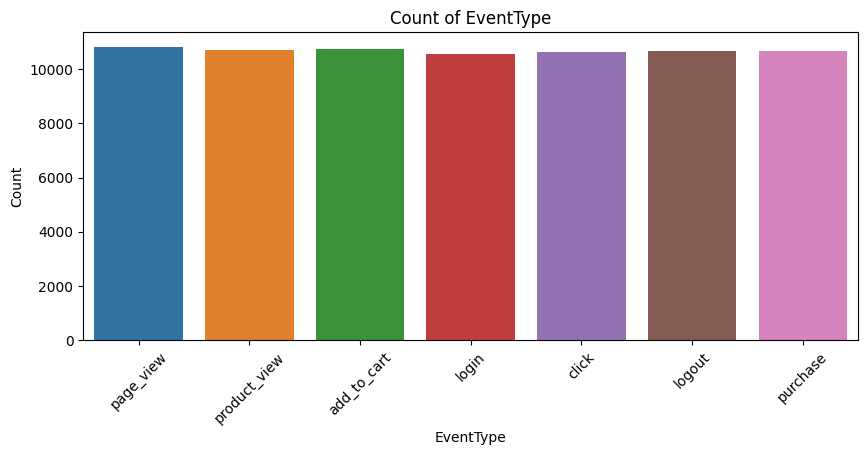

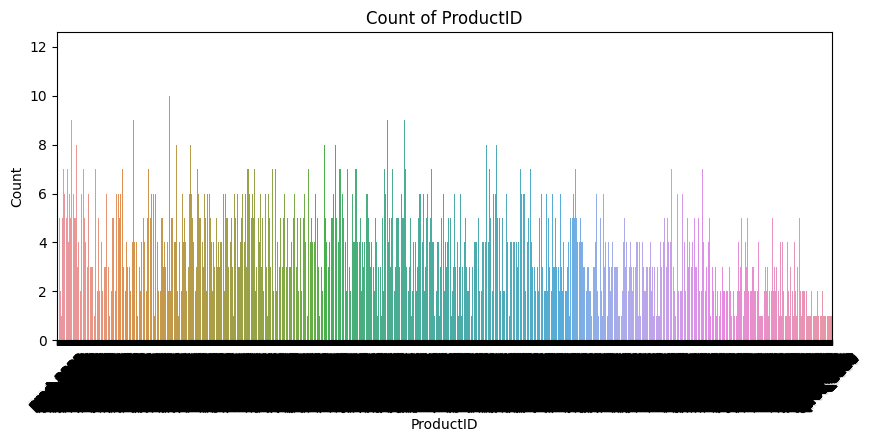

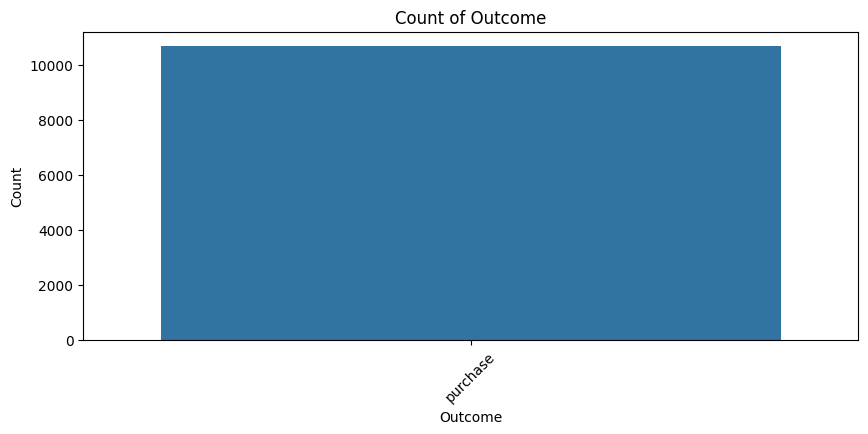

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
74812    186.208225
74813           NaN
74814           NaN
74815    198.757849
74816           NaN
Name: Amount, Length: 74817, dtype: float64


UserID         int64
SessionID      int64
Timestamp     object
EventType     object
ProductID     object
Amount       float64
Outcome       object
dtype: object
Amount    float64
dtype: object
EventType    object
ProductID    object
Outcome      object
dtype: object
Preprocessed data shape: (74817, 8756)
All feature names: ['Amount', 'EventType_add_to_cart', 'EventType_click', 'EventType_login', 'EventType_logout', 'EventType_page_view', 'EventType_product_view', 'EventType_purchase', 'ProductID_prod_1000', 'ProductID_prod_1001', 'ProductID_prod_1002', 'ProductID_prod_1004', 'ProductID_prod_1005', 'ProductID_prod_1006', 'ProductID_prod_1007', 'ProductID_prod_1008', 'ProductID_prod_1009', 'ProductID_prod_1010', 'ProductID_prod_1011', 'ProductID_prod_1012', 'ProductID_prod_1013', 'ProductID_prod_1014', 'ProductID_prod_1015', 'ProductID_prod_1016', 'ProductID_prod_1017', 'ProductID_prod_1018', 'ProductID_prod_1019', 'ProductID_prod_1020', 'ProductID_prod_1021', 'ProductID_prod_1022', 'Pro

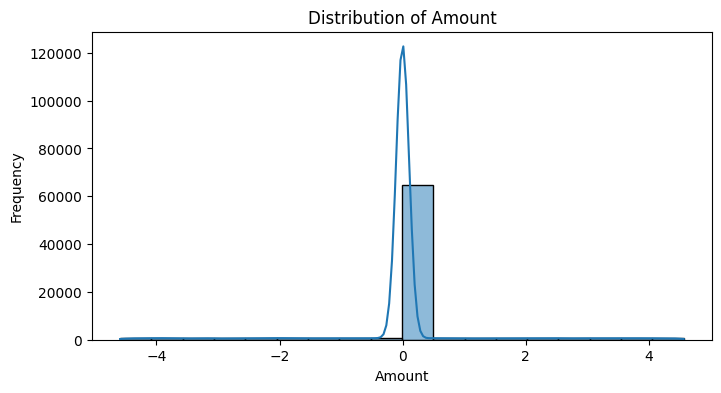

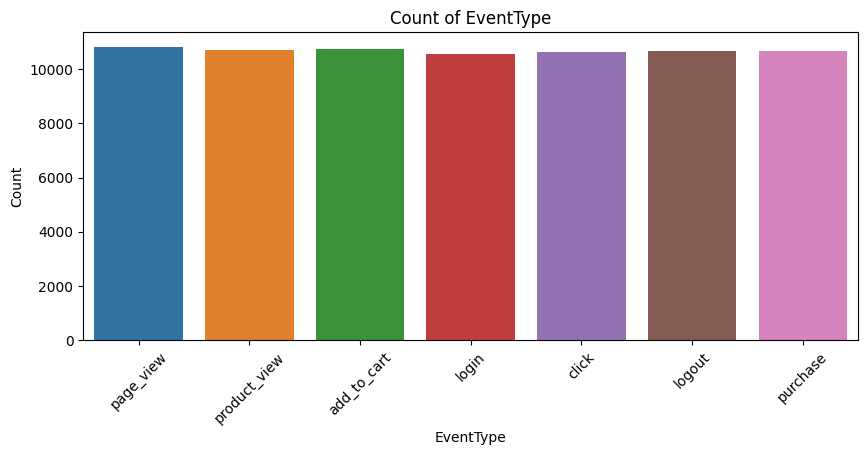

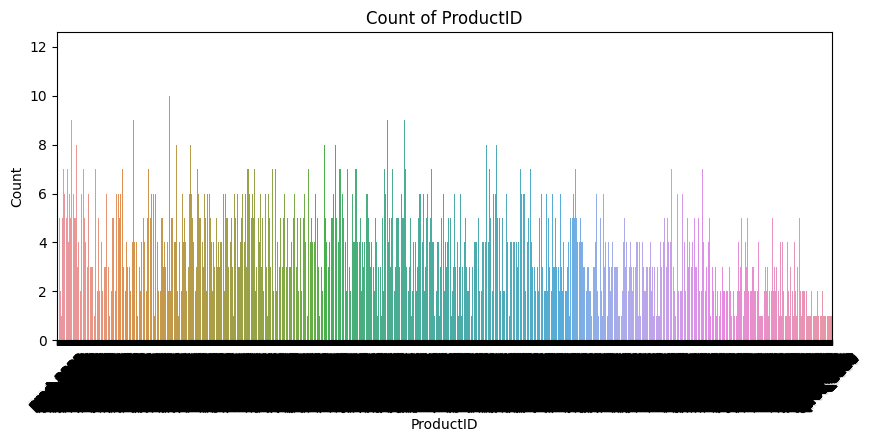

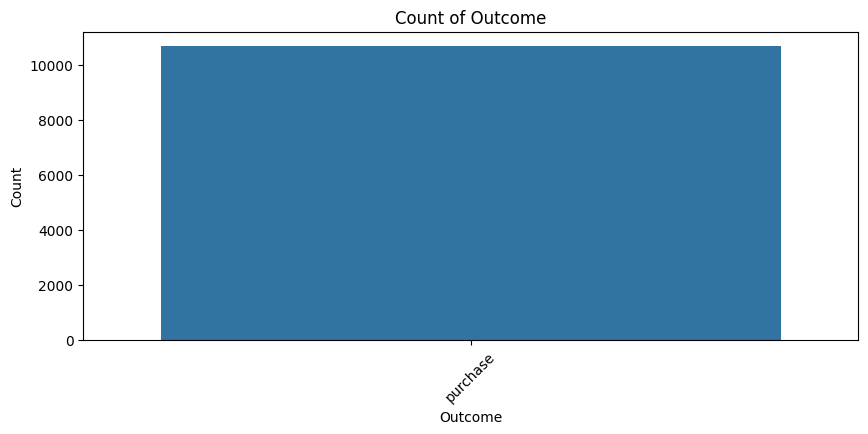

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
74812    186.208225
74813           NaN
74814           NaN
74815    198.757849
74816           NaN
Name: Amount, Length: 74817, dtype: float64


In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC


# Load data
file_path = 'C:/Users/Admin/Desktop/ecommerce_clickstream_transactions.csv'
clickstream_data = pd.read_csv(file_path)

# Inspect data types
print(clickstream_data.dtypes)

# Define numeric and categorical features correctly
numeric_features = ['Amount']  # Ensure these are indeed numerical
categorical_features = ['EventType', 'ProductID', 'Outcome']  # Ensure these are categorical

# Check the data types of these columns
print(clickstream_data[numeric_features].dtypes)
print(clickstream_data[categorical_features].dtypes)

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocess the data
try:
    X_preprocessed = preprocessor.fit_transform(clickstream_data)
    print("Preprocessed data shape:", X_preprocessed.shape)
except Exception as e:
    print("An error occurred during preprocessing:", e)

# Extract feature names
num_feature_names = numeric_features
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = list(num_feature_names) + list(cat_feature_names)
print("All feature names:", all_feature_names)
print("Length of all feature names:", len(all_feature_names))
print("Shape of preprocessed data:", X_preprocessed.shape)

# Create DataFrame with preprocessed data
try:
    # Check if the data is sparse and convert it to a dense array if necessary
    if sparse.issparse(X_preprocessed):
        X_preprocessed = X_preprocessed.toarray()

    # Create the DataFrame after ensuring the data is dense
    X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)

    # Print the type of preprocessed data
    print("Type of X_preprocessed:", type(X_preprocessed)) 
    print("Preprocessed DataFrame head:")
    print(X_preprocessed_df.head())
except ValueError as ve:
    print("ValueError:", ve)
    print("The number of columns in preprocessed data:", X_preprocessed.shape[1])
    print("The number of feature names provided:", len(all_feature_names))
for col in numeric_features:
    print(numeric_features)
    plt.figure(figsize=(8, 4))
    sns.histplot(X_preprocessed_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=clickstream_data, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
target_variable = clickstream_data ['Amount']
print(target_variable)



In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest

# Load data
file_path = 'C:/Users/Admin/Desktop/ecommerce_clickstream_transactions.csv'
clickstream_data = pd.read_csv(file_path)

# Inspect data types and first few rows
print(clickstream_data.dtypes)
print(clickstream_data.head())

# Check for missing values in the target variable
missing_target = clickstream_data['Outcome'].isnull().sum()
print("Missing values in target variable 'Outcome':", missing_target)

# Fill missing values in the target variable if any
clickstream_data['Outcome'].fillna(clickstream_data['Outcome'].mode()[0], inplace=True)

# Print unique values and value counts in the target variable
unique_outcomes = clickstream_data['Outcome'].unique()
print("Unique values in 'Outcome':", unique_outcomes)
print("Value counts of 'Outcome':\n", clickstream_data['Outcome'].value_counts())

# Check for only one class
if len(unique_outcomes) <= 1:
    raise ValueError("Target variable 'Outcome' contains only one class. At least two classes are required for classification.")

# Encode the target variable
label_encoder = LabelEncoder()
clickstream_data['Outcome'] = label_encoder.fit_transform(clickstream_data['Outcome'])

# Define numeric and categorical features
numeric_features = ['Amount']
categorical_features = ['EventType', 'ProductID']

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Use default sparse output
])

# Apply transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    sparse_threshold=0  # Ensure output is sparse
)

# Preprocess the data
try:
    X_preprocessed = preprocessor.fit_transform(clickstream_data)
    print("Preprocessed data shape:", X_preprocessed.shape)
except Exception as e:
    print("An error occurred during preprocessing:", e)

# Extract target variable
target_variable = clickstream_data['Outcome']

# Split the data with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, target_variable, test_size=0.2, random_state=42, stratify=target_variable)

# Check the distribution of target classes in training and test sets
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Test set class distribution:\n", y_test.value_counts(normalize=True))

# Apply SMOTE to balance the classes in the training set if necessary
if len(np.unique(y_train)) > 1:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train = X_train_resampled
    y_train = y_train_resampled
    # Check the distribution of target classes after resampling
    print("Resampled training set class distribution:\n", y_train_resampled.value_counts(normalize=True))
else:
    print("Skipping SMOTE as there's only one class in the training set.")

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
for name, model in models.items():
    # Check if target variable has more than one class
    if len(np.unique(y_train)) > 1:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        print(f"{name} Model:\n")
        print(f"Accuracy: {accuracy}\n")
        print(f"Classification Report:\n{report}\n")
    else:
        print(f"Skipping {name} as there's only one class in the training set.")

# Example of handling a single class situation with anomaly detection or clustering
if len(unique_outcomes) <= 1:
    print("Only one class available. Proceeding with anomaly detection or clustering.")
    # Example of anomaly detection
    anomaly_detector = IsolationForest(contamination=0.01, random_state=42)
    # Fit the model (Note: This example assumes X_preprocessed contains the feature data)
    anomaly_detector.fit(X_preprocessed)
    # Predict anomalies
    anomalies = anomaly_detector.predict(X_preprocessed)
    print("Anomalies detected:", np.sum(anomalies == -1))


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/ecommerce_clickstream_transactions.csv'

Column 'churn' not found in categorical features.
